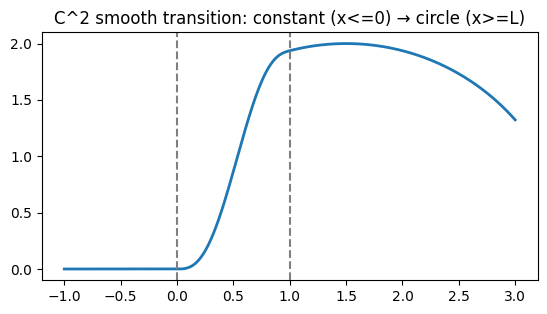

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def s_quintic(t):
    return 6*t**5 - 15*t**4 + 10*t**3

def y_circ(x, L=1, d=0.5, yc=0.0, R=2.0):
    xc = L + d
    val = yc + np.sqrt(np.maximum(R**2 - (x - xc)**2, 0.0))
    return val

def y_blend(x, c=0.0, L=1.0, d=0.5, yc=0.0, R=2.0):
    y = np.empty_like(x)
    # left
    left = x <= 0
    y[left] = c
    # right
    right = x >= L
    y[right] = y_circ(x[right], L=L, d=d, yc=yc, R=R)
    # middle
    mid = (~left) & (~right)
    t = x[mid]/L
    s = s_quintic(t)
    ymid = c + s*(y_circ(x[mid], L=L, d=d, yc=yc, R=R) - c)
    y[mid] = ymid
    return y

x = np.linspace(-1.0, 3.0, 800)
y = y_blend(x, c=0.0, L=1.0, d=0.5, yc=0.0, R=2.0)

plt.plot(x, y, lw=2)
plt.axvline(0, color='gray', ls='--')
plt.axvline(1.0, color='gray', ls='--')
plt.gca().set_aspect('equal', adjustable='box')
plt.title('C^2 smooth transition: constant (x<=0) → circle (x>=L)')
plt.show()
